Были установлены следующие факты:
1) Компании AA, US и AS опаздывают примерно на 10 минут меньше, чем остальные.
2) Кроме этого, перечисленные компании также самые "точные" (то есть, разброс опозданий у них наименьший. К примеру, если человеку важна пунктуальность, ему скорее будет выгодно лететь компанией, которая в среднем опаздывает на пятнадцать минут, чем компанией с меньшей задержкой, но большей вероятностью форс-мажора, в результате которого он опоздает на час)
3) Установлено, что доля полетов, совершаемых этими компаниями, отвечает количеству компаний. Т.е. их пунктуальность не может быть завязана лишь на меньшем количестве рейсов и большому потоку клиентов у их конкурентов.
4) Исследовано, как влияет средняя дальность рейсов компании на ее сервис.
5) Выяснено, что видимость, хоть и оказывает значительное влияние на задежку, влияет нелинейно. Важен сам факт наличия помех, а не их интенсивность.
6) Опоздание сильно зависит от времени суток -- следует обратить внимание на ночные вылеты.
7) Исследовано влияние времени года на задержку рейсов.
8) Показано, что на задержку в летние месяцы не может влиять количество рейсов. Скорее всего, влияет меньшее количество сотрудников в сезон отпусков.
9) Более точно оценена корреляция между видимостью и задержкой (результат составил около 40%)
10) Рассчитано, у каких из трех аэропортов Нью-Йорка наибольшие задержки.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flight = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
weather = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

fd = pd.read_csv(flight, sep=',')
wd = pd.read_csv(weather, sep = ',')
fd = fd.drop(['Unnamed: 0', 'year'], axis = 'columns')
wd = wd.drop(['Unnamed: 0', 'year'], axis = 'columns')

fd.head(10)

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


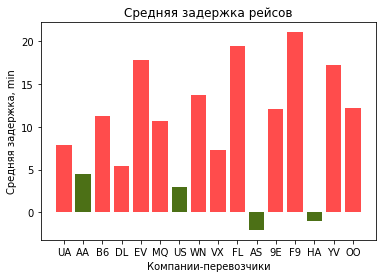

Компании с наименьшим средним опозданием:  ['AS', 'HA', 'US', 'AA']
Задержка у топовых компаний в среднем на  10.9  минут меньше, чем у остальных


In [117]:
dep_delay = fd.groupby('carrier')['dep_delay'].mean()
arr_delay = fd.groupby('carrier')['arr_delay'].mean()
carrier = fd['carrier'].unique()

total_delay = (dep_delay + arr_delay) / 2
top1 = np.argsort(total_delay)[:4]
top_values1 = pd.Series(np.zeros(total_delay.size), total_delay.index)
top_values1[top1] = total_delay[top1]

plt.bar(carrier, total_delay[carrier],color = 'red', alpha = 0.7)
plt.bar(carrier, top_values1[carrier],color = 'green', alpha = 0.7)

plt.title("Средняя задержка рейсов")
plt.xlabel("Компании-перевозчики")
plt.ylabel("Средняя задержка, min")

plt.show()
print('Компании с наименьшим средним опозданием: ', list(top_values1[top1].index))

print("Задержка у топовых компаний в среднем на ", round(total_delay.sum()/ 13 - top_values1.sum() / 3,1)," минут меньше, чем у остальных")

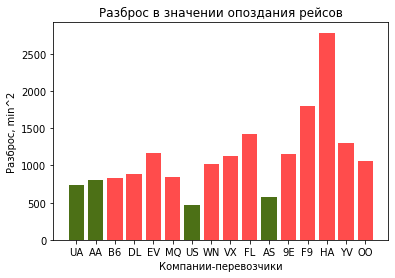

Компании с наименьшим разбросом опозданий:  ['US', 'AS', 'UA', 'AA']
Наиболее пунктуальные компании:  ['US', 'AA', 'AS']


In [118]:
dep_delay = fd.groupby('carrier')['dep_delay'].var()
arr_delay = fd.groupby('carrier')['arr_delay'].var()
carrier = fd['carrier'].unique()

total_delay = (dep_delay + arr_delay)/4
top2 = np.argsort(total_delay)[:4]
top_values2 = pd.Series(np.zeros(total_delay.size), total_delay.index)
top_values2[top2] = total_delay[top2]

plt.bar(carrier, total_delay[carrier],color = 'red', alpha = 0.7)
plt.bar(carrier, top_values2[carrier],color = 'green', alpha = 0.7)

plt.title("Разброс в значении опоздания рейсов")
plt.xlabel("Компании-перевозчики")
plt.ylabel("Разброс, min^2")

plt.show()

print('Компании с наименьшим разбросом опозданий: ', list(top_values2[top2].index))
print('Наиболее пунктуальные компании: ', list(set(top_values1[top1].index)&set(top_values2[top2].index)))

Доля полетов, совершаемых топовыми компаниями --  16.03 %
Доля топовый компаний --  18.75 %


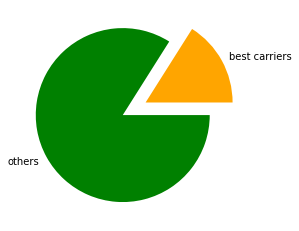

In [119]:
flights_per_carrier = fd.groupby('carrier')['flight'].count()
best_carriers = flights_per_carrier[['AA', 'US', 'AS']].sum()
others = flights_per_carrier.sum() - best_carriers

plt.pie([best_carriers, others], colors=['orange', 'green'], explode = (0.3, 0), labels= ['best carriers','others'])
print("Доля полетов, совершаемых топовыми компаниями -- ", round(100*best_carriers / (others + best_carriers),2), "%")
print("Доля топовый компаний -- ", 100*3/16, "%")
plt.show()

Кроме явной корреляции в правой части графика, есть и исключения, например, компания AS, входящая в топ наиболее пунктальных.
Эта компания совершает перелеты на средние расстояния, но тем не менее, ее сервис остается качественным.


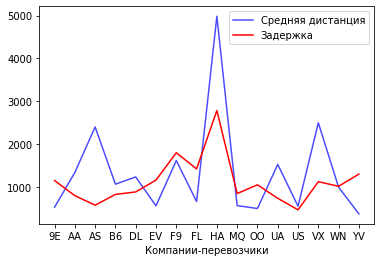

In [120]:
average_distance = fd.groupby('carrier')['distance'].mean()

plt.plot(average_distance, color = 'blue', alpha = 0.7, label="Средняя дистанция")
plt.plot(total_delay, color = 'red', label="Задержка")
plt.xlabel("Компании-перевозчики")

print("Кроме явной корреляции в правой части графика, есть и исключения, например, компания AS, входящая в топ наиболее пунктальных.")
print("Эта компания совершает перелеты на средние расстояния, но тем не менее, ее сервис остается качественным.")
plt.legend()
plt.show()

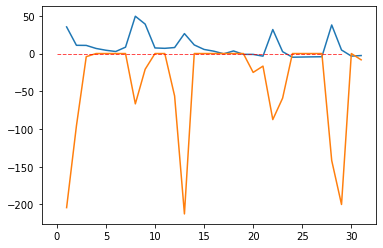

In [121]:
daily_dep_delay = fd.groupby(['month','day'])['dep_delay'].mean()
daily_arr_delay = fd.groupby(['month','day'])['arr_delay'].mean()

visibility = wd.groupby(['month','day'])['visib'].mean()

daily_total_delay = (daily_arr_delay + daily_dep_delay)/2
plt.plot(daily_total_delay[8])
plt.plot(100*visibility[8]-1000)
plt.plot(np.arange(30), 32*np.zeros(30), 'r--', linewidth = 1, alpha = 0.7)
plt.show()

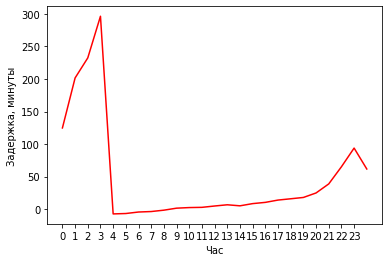

In [122]:
dep_delay = fd.groupby('hour')['dep_delay'].mean()
arr_delay = fd.groupby('hour')['arr_delay'].mean()

total_delay = (arr_delay + dep_delay) / 2
plt.xticks(np.arange(24))
plt.plot(total_delay, color = 'red')
plt.ylabel("Задержка, минуты")
plt.xlabel("Час")
plt.show()

Опоздание в летние месяцы на  12.3  min больше, чем в остальные


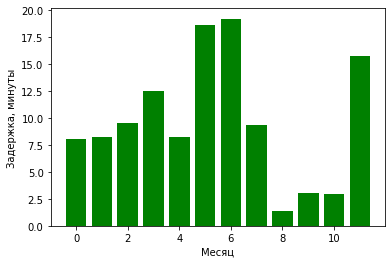

In [123]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dep_delay = fd.groupby('month')['dep_delay'].mean()
arr_delay = fd.groupby('month')['arr_delay'].mean()

total_delay = (arr_delay + dep_delay) / 2

plt.bar(np.arange(12),total_delay, color = "green")
plt.ylabel("Задержка, минуты")
plt.xlabel("Месяц")
print("Опоздание в летние месяцы на ", round(2*total_delay[5:7].sum() / 3 - total_delay.sum() / 9,1)," min больше, чем в остальные")
plt.show()

Видно, что число полетов не зависит от месяца


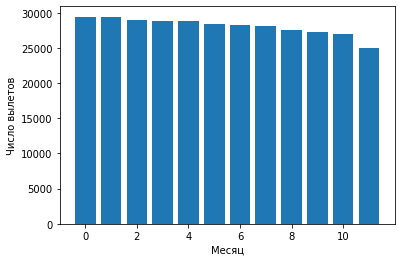

In [124]:
print("Видно, что число полетов не зависит от месяца")
plt.bar(np.arange(12), fd['month'].value_counts())
plt.ylabel('Число вылетов')
plt.xlabel('Месяц')
plt.show()

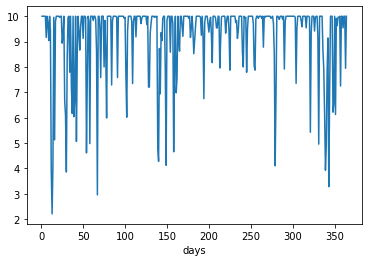

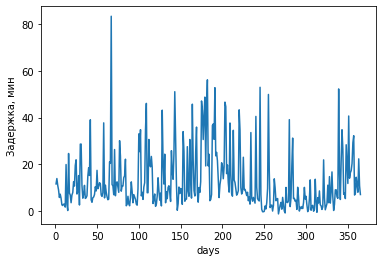

Корреляция  40.89 % 


In [141]:
x4 = np.arange(12)
x4 = fd.groupby('month')['day'].max()
X = np.zeros(12)
for i in range(11):
    X[i+1]=X[i]+x4[i+1]
wd['month'] = pd.to_numeric(wd['month'], errors='coerce')
wd = wd.dropna(subset=['month'])
wd['month'] = wd['month'].astype(int)

wd['days'] = wd['day']+X[wd['month']-1]
fd['days'] = fd['day']+X[fd['month']-1]

wd.groupby('days')['visib'].mean().plot()
plt.show("Видимость")
fd.groupby('days')['dep_delay'].mean().plot()
plt.ylabel('Задержка, мин')
plt.show()

print("Корреляция ",round(-100*np.corrcoef(fd.groupby('days')['dep_delay'].mean().head(364),wd.groupby('days')['visib'].mean())[0][1],2), "% ")

Доля EWR --  41.74 % 
Доля JFK --  30.45 % 
Доля LGA --  27.81 % 
Рейсы в EWR задерживают примерно на  10  min больше


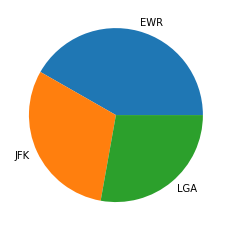

In [96]:
dep_delay = fd.groupby('origin')['dep_delay'].mean()
arr_delay = fd.groupby('origin')['arr_delay'].mean()

total_delay = (arr_delay + dep_delay) / 2

plt.pie(total_delay, labels=["EWR", "JFK", "LGA"])
print("Доля EWR -- ", round(100 * total_delay["EWR"] / total_delay.sum(),2), "% ")
print("Доля JFK -- ", round(100 * total_delay["JFK"] / total_delay.sum(),2), "% ")
print("Доля LGA -- ", round(100 * total_delay["LGA"] / total_delay.sum(),2), "% ")

print("Рейсы в EWR задерживают примерно на ", round(2*total_delay["EWR"] - total_delay.sum()/2), " min больше")

Краткий вывод: следует увеличить долю компаний AS, US, AA, т.к. они предоставляют лучший сервис. Летние месяцы нагружены предположительно из-за сезона отпусков среди сотрудников. Видимость, порыв ветра и дальность полета несомненно влияют на среднюю задержку в негативную сторону.